In [ ]:
"""
A1
For the data table provided below, calculate the entropy associated with each attribute / feature
at the root node. Using this information, identify the first feature that you’d select for constructing
the decision tree. Use Information Gain as the impurity measure to identify the root node.
‘buys_computer’ is the class label
"""

In [5]:
import pandas as pd
import numpy as np
data = {
    "age": ["<=30", "<=30", "31...40", ">40", ">40", ">40", "31...40", "<=30", "<=30", ">40", "<=30", "31...40", "31...40", ">40"],
    "income": ["high", "high", "high", "medium", "low", "low", "medium", "medium", "low", "medium", "low", "medium", "high", "medium"],
    "student": ["no", "no", "no", "no", "yes", "yes", "yes", "no", "yes", "yes", "yes", "yes", "no", "yes"],
    "credit_rating": ["fair", "excellent", "fair", "fair", "fair", "excellent", "excellent", "fair", "fair", "fair", "excellent", "excellent", "fair", "fair"],
    "buys_computer": ["no", "no", "yes", "yes", "yes", "no", "yes", "no", "yes", "yes", "yes", "yes", "yes", "yes"]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Show the DataFrame
print(df)

        age  income student credit_rating buys_computer
0      <=30    high      no          fair            no
1      <=30    high      no     excellent            no
2   31...40    high      no          fair           yes
3       >40  medium      no          fair           yes
4       >40     low     yes          fair           yes
5       >40     low     yes     excellent            no
6   31...40  medium     yes     excellent           yes
7      <=30  medium      no          fair            no
8      <=30     low     yes          fair           yes
9       >40  medium     yes          fair           yes
10     <=30     low     yes     excellent           yes
11  31...40  medium     yes     excellent           yes
12  31...40    high      no          fair           yes
13      >40  medium     yes          fair           yes


In [6]:
#Calculating the entropy for each attribute
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_value = -np.sum([(counts[i]/np.sum(counts)) * np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy_value


def info_gain(data, split_attribute_name, target_name="buys_computer"):
    # Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])

    # Find the values and counts of the selected attribute
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)

    # Calculate the weighted entropy of the subsets
    weighted_entropy = np.sum([(counts[i]/np.sum(counts)) * entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])

    # Calculate the information gain
    information_gain = total_entropy - weighted_entropy
    return information_gain

In [7]:
def main():
    entropy_buys_computer = entropy(df['buys_computer'])
    print(f"Entropy of 'buys_computer': {entropy_buys_computer}")

# Calculate information gain for each attribute
    attributes = ['age', 'income', 'student', 'credit_rating']

    for attribute in attributes:
        gain = info_gain(df, attribute)
        print(f"Information Gain for {attribute}: {gain}")

# Determine which attribute to use at the root node (highest Information Gain)
    root_node = max(attributes, key=lambda attr: info_gain(df, attr))
    print(f"Root Node (First Split): {root_node}")
    
if __name__ == "__main__":
    main()

Entropy of 'buys_computer': 0.863120568566631
Information Gain for age: 0.2585210366587628
Information Gain for income: 0.06703149515758411
Information Gain for student: 0.12394088673829029
Information Gain for credit_rating: 0.02507817350585062
Root Node (First Split): age


In [8]:
"""
A2
Create a Decision Tree for the above data. Get the depth of the constructed tree
"""

'\nA2\nCreate a Decision Tree for the above data. Get the depth of the constructed tree\n'

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    label_encoder = LabelEncoder()
    for column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])
    return df

#splitting data into training and testing datasets
def split_data(df):
    X = df.drop(columns=['buys_computer'])  # Features
    y = df['buys_computer']  # Target variable
    return X, y

def train_decision_tree(X, y):
    model = DecisionTreeClassifier()
    model.fit(X, y)
    return model

def evaluate_model(model, X, y):
    accuracy = model.score(X, y)
    depth = model.get_depth()
    return accuracy, depth


In [10]:
#main function
def main():
    data = {
    "age": ["<=30", "<=30", "31...40", ">40", ">40", ">40", "31...40", "<=30", "<=30", ">40", "<=30", "31...40", "31...40", ">40"],
    "income": ["high", "high", "high", "medium", "low", "low", "medium", "medium", "low", "medium", "low", "medium", "high", "medium"],
    "student": ["no", "no", "no", "no", "yes", "yes", "yes", "no", "yes", "yes", "yes", "yes", "no", "yes"],
    "credit_rating": ["fair", "excellent", "fair", "fair", "fair", "excellent", "excellent", "fair", "fair", "fair", "excellent", "excellent", "fair", "fair"],
    "buys_computer": ["no", "no", "yes", "yes", "yes", "no", "yes", "no", "yes", "yes", "yes", "yes", "yes", "yes"]
}
    df = pd.DataFrame(data)
    df = preprocess_data(df)
    X, y = split_data(df)
    model = train_decision_tree(X, y)
    accuracy, depth = evaluate_model(model, X, y)
    
#printing the results
    print(f"Training Set Accuracy: {accuracy}")
    print(f"Depth of the Decision Tree: {depth}")

if __name__ == "__main__":
    main()

Training Set Accuracy: 1.0
Depth of the Decision Tree: 4


In [12]:
"""
Visualize the constructed tree with plot_tree() command. Following code snippet for help.

"""

'\nVisualize the constructed tree with plot_tree() command. Following code snippet for help.\n\n'

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def create_data():
    # Create the dataset based on the image you provided earlier
    data = {
        'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
        'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', '<=30', 'medium', 'high', 'medium'],
        'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes'],
        'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
        'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes']
    }
    df = pd.DataFrame(data)
    return df

def preprocess_data(df):
    # Encode categorical features into numerical values
    le = LabelEncoder()
    for column in df.columns:
        df[column] = le.fit_transform(df[column])
    return df

def split_data(df):
    # Split the dataset into features (X) and target (y)
    X = df.drop(columns='buys_computer')
    y = df['buys_computer']
    return X, y

def train_decision_tree(X, y):
    # Train a decision tree classifier
    model = DecisionTreeClassifier()
    model.fit(X, y)
    return model

def evaluate_model(model, X, y):
    # Evaluate the model for training accuracy and get the tree depth
    accuracy = model.score(X, y)  # Training set accuracy
    depth = model.get_depth()  # Tree depth
    return accuracy, depth

def visualize_tree(model, X):
    # Visualize the decision tree
    plt.figure(figsize=(15, 10))  # Adjust the size for better visibility
    plot_tree(model, filled=True, feature_names=X.columns.tolist(), class_names=['No', 'Yes'], rounded=True)
    plt.show()

Training Set Accuracy: 1.0
Depth of the Decision Tree: 5


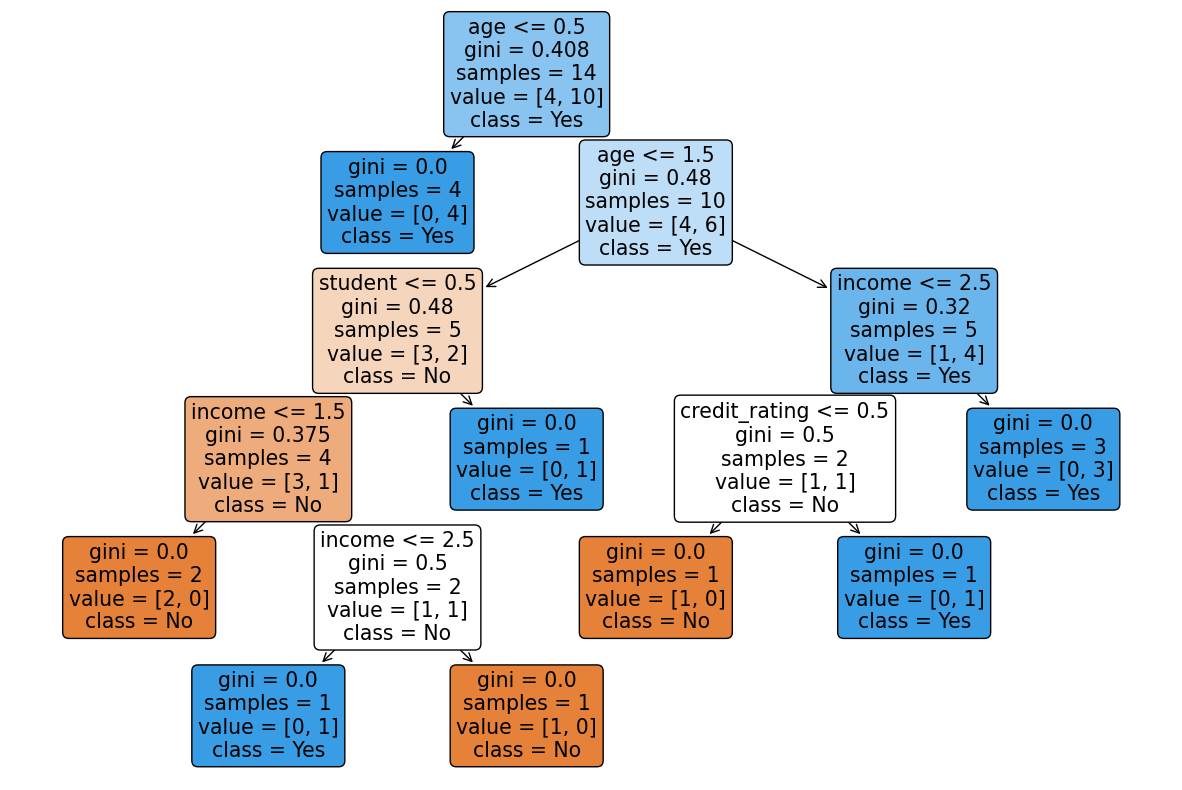

In [31]:
def main():
    # Step 1: Create the dataset
    df = create_data()

    # Step 2: Preprocess the dataset (label encoding)
    df = preprocess_data(df)

    # Step 3: Split the dataset into features (X) and the target (y)
    X, y = split_data(df)

    # Step 4: Train the decision tree classifier
    model = train_decision_tree(X, y)

    # Step 5: Evaluate the model's performance
    accuracy, depth = evaluate_model(model, X, y)
    
    # Step 6: Print the evaluation results
    print(f"Training Set Accuracy: {accuracy}")
    print(f"Depth of the Decision Tree: {depth}")

    # Step 7: Visualize the decision tree
    visualize_tree(model, X)
    
if __name__ == "__main__":
    main()  # Calls the main function to execute the entire pipeline


In [ ]:
"""
A4
 Create a Decision Tree classifier on your project data. Study the accuracy for training and test
data and infer the accuracy of tree construction. Plot the Decision Tree obtained above.
"""

In [12]:
import pandas as pd
neo_data = pd.read_csv("C:\\Users\\everybody\\Downloads\\neo.csv\\neo.csv")
print(neo_data)

             id                 name  est_diameter_min  est_diameter_max  \
0       2162635  162635 (2000 SS164)          1.198271          2.679415   
1       2277475    277475 (2005 WK4)          0.265800          0.594347   
2       2512244   512244 (2015 YE18)          0.722030          1.614507   
3       3596030          (2012 BV13)          0.096506          0.215794   
4       3667127          (2014 GE35)          0.255009          0.570217   
...         ...                  ...               ...               ...   
90831   3763337           (2016 VX1)          0.026580          0.059435   
90832   3837603           (2019 AD3)          0.016771          0.037501   
90833  54017201           (2020 JP3)          0.031956          0.071456   
90834  54115824           (2021 CN5)          0.007321          0.016370   
90835  54205447           (2021 TW7)          0.039862          0.089133   

       relative_velocity  miss_distance orbiting_body  sentry_object  \
0           135

In [13]:
#first normalizing the values of the dataset
final_neo_data = neo_data[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']]

#ensuring that the values are numeric:
for column in ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']:
    final_neo_data.loc[:,column] = pd.to_numeric(final_neo_data[column], errors='coerce')

#normalizing the values using min max normalization
final_neo_data = (final_neo_data - final_neo_data.min())/(final_neo_data.max() - final_neo_data.min())
#adding the hazardous column as that's our target
final_neo_data['hazardous'] = neo_data['hazardous']
final_neo_data

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0.031607,0.031607,0.056447,0.733141,0.312891,False
1,0.006999,0.006999,0.309922,0.821364,0.449312,True
2,0.019039,0.019039,0.481680,0.665740,0.358782,False
3,0.002531,0.002531,0.103726,0.339986,0.541093,False
4,0.006714,0.006714,0.179632,0.618634,0.453066,True
...,...,...,...,...,...,...
90831,0.000685,0.000685,0.219081,0.164371,0.657906,False
90832,0.000427,0.000427,0.193893,0.726208,0.699625,False
90833,0.000827,0.000827,0.031097,0.379640,0.641218,False
90834,0.000177,0.000177,0.291384,0.918352,0.774718,False


In [19]:
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_value = -np.sum([(counts[i]/np.sum(counts)) * np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy_value


def info_gain(data, split_attribute_name, target_name="hazardous"):
    # Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])

    # Find the values and counts of the selected attribute
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)

    # Calculate the weighted entropy of the subsets
    weighted_entropy = np.sum([(counts[i]/np.sum(counts)) * entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])

    # Calculate the information gain
    information_gain = total_entropy - weighted_entropy
    return information_gain

In [ ]:
entropy_hazardous = entropy(final_neo_data['hazardous'])
print(f"Entropy of 'hazardous': {entropy_hazardous}")

# Calculate information gain for each attribute
attributes = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance','absolute_magnitude']

for attribute in attributes:
    gain = info_gain(final_neo_data, attribute,'hazardous')
    print(f"Information Gain for {attribute}: {gain}")

# Determine which attribute to use at the root node (highest Information Gain)
root_node = max(attributes, key=lambda attr: info_gain(df, attr))
print(f"Root Node (First Split): {root_node}")
    
if __name__ == "__main__":
    main()